# **Title of Project**

Bank Customer Churn Model


## **Objective**

The objective of this project is to develop a predictive model to accurately identify bank customers likely to churn. This will be achieved through a comprehensive process involving data encoding, feature scaling, and addressing class imbalance using both Random Under Sampling and Random Over Sampling techniques. The model will be built using a Support Vector Machine (SVM) classifier, with Grid Search employed for hyperparameter tuning to optimize performance and ensure robust, reliable predictions.

## **Data Source**

https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv

## **Import Library**

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Import Data**

In [91]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

## **Describe Data**

In [92]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [94]:
df.duplicated('CustomerId').sum()

0

In [95]:
df = df.set_index('CustomerId')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


## **Data Visualization**

In [97]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


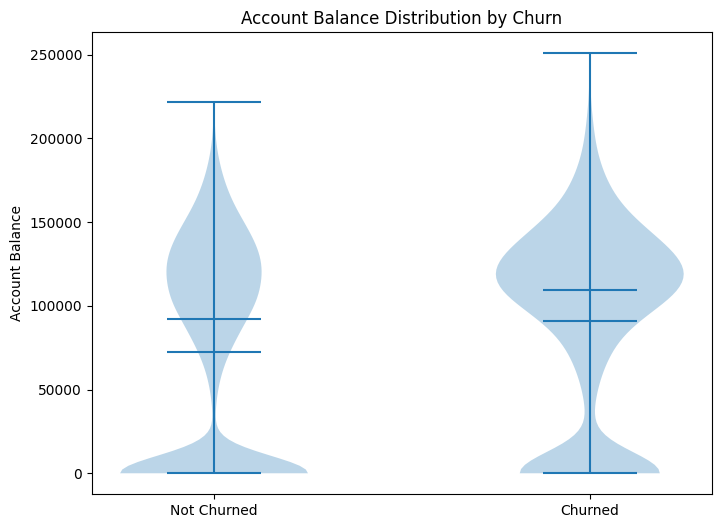

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.violinplot([df[df['Churn'] == 0]['Balance'], df[df['Churn'] == 1]['Balance']],
               showmeans=True, showmedians=True)
plt.xticks([1, 2], ['Not Churned', 'Churned'])
plt.ylabel('Account Balance')
_ = plt.title('Account Balance Distribution by Churn')

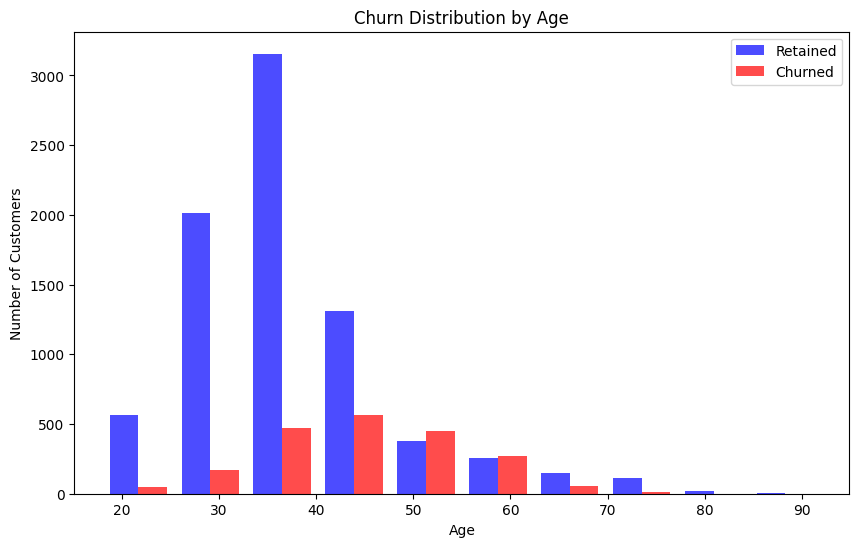

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist([df[df['Churn'] == 0]['Age'], df[df['Churn'] == 1]['Age']],
         bins=10, label=['Retained', 'Churned'], color=['blue', 'red'], alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Churn Distribution by Age')
_ = plt.legend()

## **Data Preprocessing**

In [100]:
# @markdown Data Encoding

df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [101]:
df.replace({'Geography': {'France': 2, 'Germany': 1, 'Spain': 0}}, inplace=True)

In [102]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [103]:
df.replace({'Gender': {'Male': 0, 'Female': 1}}, inplace=True)

In [104]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [105]:
df.replace({'Num Of Products': {1: 0, 2: 1, 3: 1, 4: 1}}, inplace=True)

In [106]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [107]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [108]:
df.loc[(df['Balance'] == 0), 'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [109]:
df['Zero Balance'] = np.where(df['Balance'] > 0, 1, 0)

<Axes: >

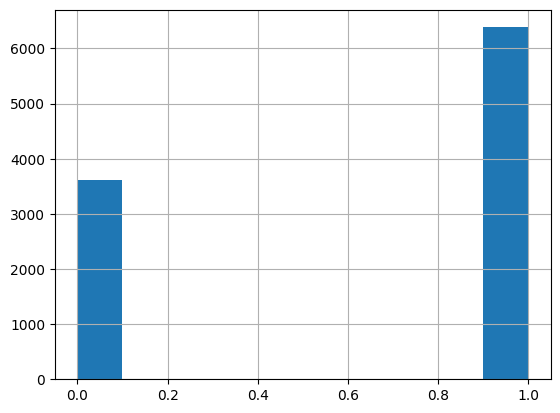

In [110]:
df['Zero Balance'].hist()

In [111]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

## **Define Target Variable (y) and Feature Variables (X)**

In [112]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [113]:
X = df.drop(['Surname', 'Churn'], axis=1)

In [114]:
y = df['Churn']

In [115]:
X.shape, y.shape

((10000, 11), (10000,))

In [116]:
# @title Handling imbalance data

df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

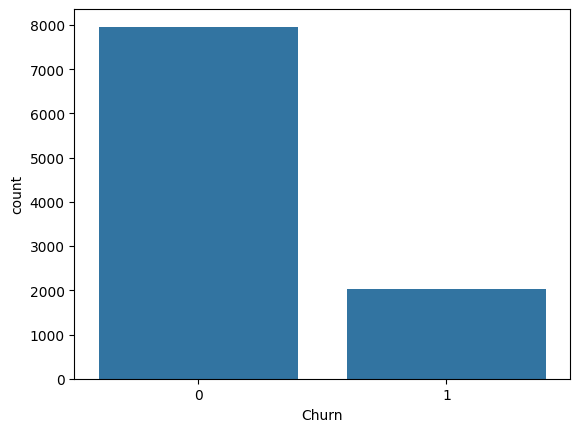

In [117]:
sns.countplot(x='Churn', data=df)

In [118]:
X.shape, y.shape

((10000, 11), (10000,))

In [119]:
# @title Random Under Sampling

from imblearn.under_sampling import RandomUnderSampler
RandomUnderSampler = RandomUnderSampler(random_state=2529)
X_R, y_R = RandomUnderSampler.fit_resample(X, y)
X_R.shape, y_R.shape, X.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [120]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [121]:
y_R.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

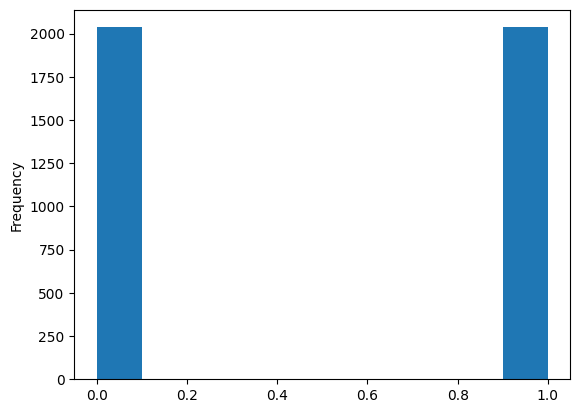

In [122]:
y_R.plot(kind='hist')

In [123]:
# @title Random Over Sampler

from imblearn.over_sampling import RandomOverSampler
RandomOverSampler = RandomOverSampler(random_state=2529)
X_Ros, y_Ros = RandomOverSampler.fit_resample(X, y)
X_Ros.shape, y_Ros.shape, X.shape, y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [124]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [125]:
y_Ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

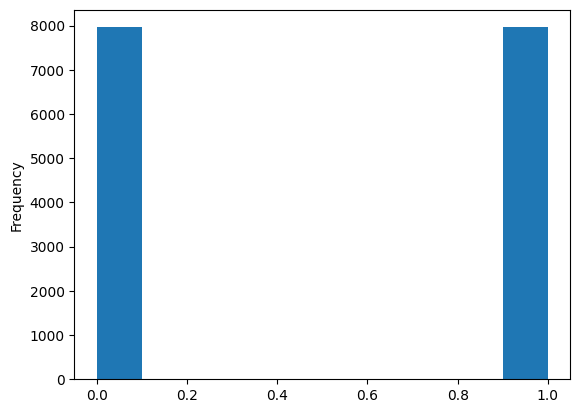

In [126]:
y_Ros.plot(kind='hist')

## **Train Test Split**

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2529)
X_train_R, X_test_R, y_train_R, y_test_R = train_test_split(X_R, y_R, test_size=0.3, random_state=2529)
X_train_Ros, X_test_Ros, y_train_Ros, y_test_Ros = train_test_split(X_Ros, y_Ros, test_size=0.3, random_state=2529)


In [128]:
# @title Standardise Features

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])
X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.transform(X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])
X_train_R[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_R[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])
X_test_R[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.transform(X_test_R[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])
X_train_Ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_Ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])
X_test_Ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.transform(X_test_Ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])


## **Modeling**

In [129]:
# @title svm classifier raw data model

from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

In [130]:
# @title hyperparameter tuning raw data model

from sklearn.model_selection import GridSearchCV
param_Grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf'], 'class_weight' : ['balanced']}
grid = GridSearchCV(SVC(), param_Grid, refit = True, verbose = 2)
grid.fit(X_train, y_train)
print(grid.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.0

In [131]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [132]:
grid_predictions = grid.predict(X_test)

In [133]:
# @title svm model with random under sampling

svc_model_R = SVC()
svc_model_R.fit(X_train_R, y_train_R)
y_pred_R = svc_model_R.predict(X_test_R)

In [134]:
# @title hyperparameter tuning random under sampled model

param_Grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf'], 'class_weight' : ['balanced']}
grid_r = GridSearchCV(SVC(), param_Grid, refit = True, verbose = 2)
grid_r.fit(X_train_R, y_train_R)
print(grid_r.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.0

In [135]:
grid_predictions_R = grid_r.predict(X_test_R)

In [136]:
# @title model with random over sampling

svc_model_Ros = SVC()
svc_model_Ros.fit(X_train_Ros, y_train_Ros)
y_pred_Ros = svc_model_Ros.predict(X_test_Ros)

In [137]:
# @title hyperparameter tuning oversampled model
param_Grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf'], 'class_weight' : ['balanced']}
grid_ros = GridSearchCV(SVC(), param_Grid, refit = True, verbose = 2)
grid_ros.fit(X_train_Ros, y_train_Ros)
print(grid_ros.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   7.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   7.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   6.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.0

## **Model Evaluation**

In [138]:
# @title Raw data model
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2381   33]
 [ 435  151]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



In [139]:
# @title Raw data model with hyperparameter tuning


print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

[[2161  253]
 [ 339  247]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2414
           1       0.49      0.42      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.66      0.67      3000
weighted avg       0.79      0.80      0.80      3000



In [140]:
# @title undersampled data model

print(confusion_matrix(y_test_R, y_pred_R))
print(classification_report(y_test_R, y_pred_R))

[[470 157]
 [173 423]]
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



In [141]:
# @title undersampled data model with hyperparameter tuning

print(confusion_matrix(y_test_R, grid_predictions_R))
print(classification_report(y_test_R, grid_predictions_R))


[[475 152]
 [172 424]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       627
           1       0.74      0.71      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.73      0.73      1223
weighted avg       0.74      0.74      0.73      1223



In [142]:
# @title oversampled data model
print(confusion_matrix(y_test_Ros, y_pred_Ros))
print(classification_report(y_test_Ros, y_pred_Ros))

[[1820  559]
 [ 624 1775]]
              precision    recall  f1-score   support

           0       0.74      0.77      0.75      2379
           1       0.76      0.74      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



In [143]:
# @title oversampled data model with hyperparameter tuning
print(confusion_matrix(y_test_Ros, grid_ros.predict(X_test_Ros)))
print(classification_report(y_test_Ros, grid_ros.predict(X_test_Ros)))

[[2050  329]
 [  68 2331]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.88      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



## **Explaination**

Data Encoding
The first step in building our Bank Customer Churn Model involves data encoding. Bank customer data often includes categorical variables such as 'Geography' and 'Gender'. These variables need to be converted into numerical values because machine learning algorithms require numerical input. For instance, 'Geography' might be encoded as 0 for France, 1 for Germany, and 2 for Spain, while 'Gender' could be encoded as 0 for Female and 1 for Male.

Feature Scaling
Feature scaling is a crucial step in data preprocessing. It ensures that all numerical features are on the same scale, which is particularly important for algorithms like Support Vector Machines (SVMs) that are sensitive to the magnitudes of the input data. In this project, we use StandardScaler to standardize features like 'Age', 'Tenure', 'Balance', and 'Estimated Salary' by removing the mean and scaling to unit variance.

Handling Imbalanced Data
In many real-world scenarios, the dataset is imbalanced, meaning that the number of customers who churn is much smaller than those who do not. This imbalance can lead to biased models that are poor at predicting the minority class. To address this, we use techniques like Random Under Sampling (RUS) and Random Over Sampling (ROS). RUS reduces the number of non-churning customers to match the number of churning customers, while ROS increases the number of churning customers by duplicating existing ones. These techniques help create a balanced dataset, improving the model's ability to detect customers who are likely to churn.

Support Vector Machine Classifier
The core of our predictive model is the Support Vector Machine (SVM) classifier. SVMs are powerful and versatile supervised learning models that can perform linear and non-linear classification, regression, and outlier detection. In our project, the SVM is trained on the processed data to distinguish between customers who are likely to churn and those who are not. The SVM works by finding the optimal hyperplane that best separates the classes in the feature space.

Grid Search for Hyperparameter Tuning
To further enhance the model's performance, we use Grid Search for hyperparameter tuning. Grid Search systematically works through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance. In this project, we tune parameters such as the regularization parameter
𝐶
C and the kernel type (linear or radial basis function). This process helps in finding the best configuration for the SVM, ensuring that it generalizes well to new, unseen data.